In [1]:
library(Seurat)
library(ggplot2)
library(RColorBrewer)
library(harmony)


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: Rcpp



In [2]:
library(liana)
library(dplyr)
library(Seurat)

library(tidyverse)
library(nichenetr)
library(Seurat)
library(ggrepel)
library(cowplot)




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.0     ✔ purrr   1.0.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 0.5.1
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
mergeData = function(mat, 
                     meta, 
                     clusterCol_name, 
                     type = 'mean'){
  meta = meta[colnames(mat),]
  res = vector(mode = 'list',length = length(unique(meta[,`clusterCol_name`])))
  names(res) = unique(meta[,`clusterCol_name`])
  for(x in unique(meta[,`clusterCol_name`])){
    sub_mat = as.matrix(mat[,which(meta[,`clusterCol_name`] == x)])
    if(type == 'mean'){
      res[[x]] = rowMeans(sub_mat)
    }else if(type == 'mean_expressed'){
      sub_mat[which(sub_mat == 0)] = NA
      res[[x]] = rowMeans(sub_mat, na.rm = TRUE)
    }else if(type == 'median'){
      res[[x]] = apply(sub_mat, 1, median)
    }
  }
  res = do.call('cbind',res)
  res[is.na(res)] = 0
  res
}

In [6]:
data = readRDS('./results/Step1_allCluster/Filtered_merged_20231108.rds')

In [117]:
merged_caf =  mergeData(data@assays$RNA@data[,which(data$cluster_name_0919 %in% c('Fibroblasts'))],
          data@meta.data,
                         'cellTypes_subsets','mean')
merged_epi =  mergeData(data@assays$RNA@data[,which(data$cluster_name_0919 %in% c('Epithelial cells'))],
          data@meta.data,
                         'cellTypes_subsets','mean')

In [127]:
merged_caf[c('HGF','FGF7','ENG','TGFBR2','ITGB1','TNFSF13B'),]

,CAF_FGF7_HGF,CAF_FGF7,Fprf,CAF_ATCA2
HGF,0.3785109,0.2163280,0.1361827,0.26599679
FGF7,0.7700262,0.7900365,0.2731534,0.09297958
ENG,0.5724419,0.4863472,0.1245130,0.52671117
TGFBR2,0.4334682,0.3895202,0.3099058,0.24452097
ITGB1,1.5878757,2.0276045,1.9631999,1.68666918
TNFSF13B,0.6221102,0.3502800,0.1025209,0.17683643


In [129]:
merged_epi[c('MET','FGFR3','BMP2','CGN','TGFB2','SLC40A1','ITGB6'),]

,Epi_CAPS,Epi_AGER,Epi_SCGB3A2,Epi_KRT17,Epi_ECM1,Epi_MKI67,Epi_DMBT1,Epi_MUC13,Epi_MGP,Epi_S100A9,Tprf,CD4_Tfh,CD4_Treg,CD8_CD4_low,CAF_FGF7_HGF
MET,0.15437325,0.4299643,0.34279700,1.0669453,0.38444311,0.43432744,0.6893204,0.09048984,0.229101730,0.31909046,0,0,0,0.0000000,0.000000
FGFR3,0.02905066,0.2143061,0.13153416,0.3050301,0.10256342,0.10472734,0.2218953,0.11307599,0.011879445,0.03835019,0,0,0,0.9682702,0.000000
BMP2,0.01501279,0.6118462,0.12729869,0.3485556,0.05482477,0.08687646,0.1831874,0.60044497,0.009836378,0.03820145,0,0,0,0.0000000,1.959228
CGN,0.26006025,0.3945886,0.15924539,0.4939550,0.17723736,0.14855135,0.2599161,0.30551693,0.016583757,0.09877756,0,0,0,0.0000000,0.000000
TGFB2,0.02787747,0.1727789,0.07743847,0.1746801,0.04036376,0.04557471,0.0366868,0.01295353,0.003851433,0.02008327,0,0,0,0.0000000,0.000000
SLC40A1,0.28975073,0.4712618,0.52474189,0.4911607,0.58921136,0.31899679,0.7959228,0.57693979,0.284607669,0.16697601,0,0,0,0.0000000,0.000000
ITGB6,0.09070273,0.8726778,0.44812588,0.4529877,0.22124345,0.19838105,0.6523452,0.34308314,0.052557116,0.07929446,0,0,0,0.0000000,0.000000


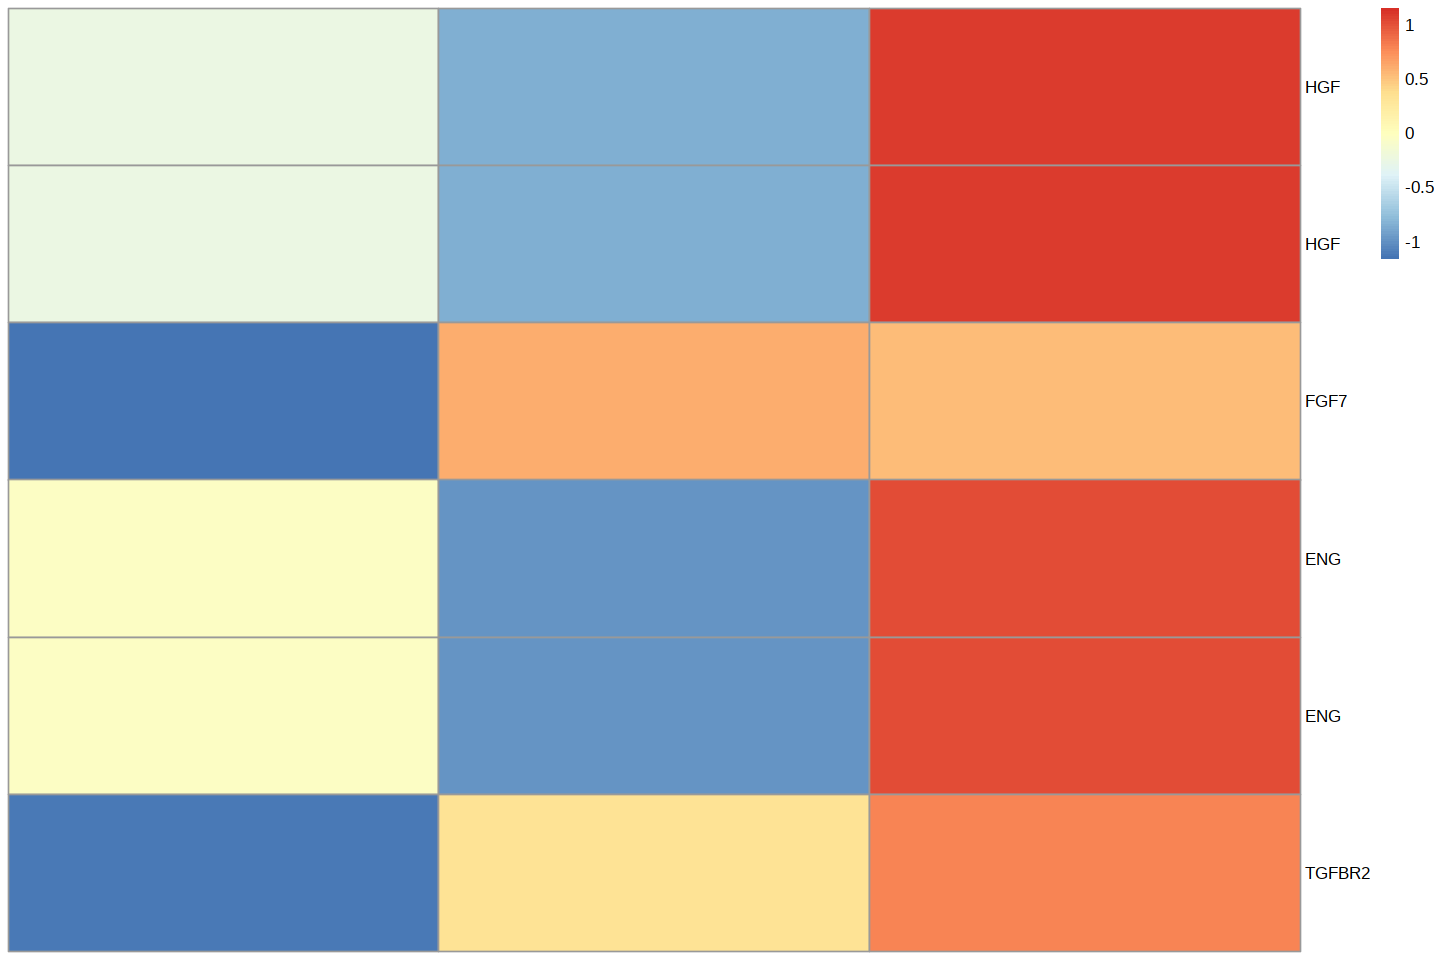

In [158]:
p = pheatmap::pheatmap(merged_caf[c('HGF','HGF','FGF7','ENG','ENG','TGFBR2'),rev(c('CAF_FGF7_HGF','CAF_FGF7','CAF_ATCA2'))],
                  scale ='row',
                  cluster_rows = F,
                   cluster_cols = F,
                   show_colnames  = F
                  )

In [159]:
pdf('./results//figures/published/Figure3/heatmap_interaction_cafs.pdf',width = 4,height = 5)
print(p)
dev.off()

png 
  2

In [143]:
sort(colnames(merged_epi))

[1] "CAF_FGF7_HGF" "CD4_Tfh"      "CD4_Treg"     "CD8_CD4_low"  "Epi_AGER"    
 [6] "Epi_CAPS"     "Epi_DMBT1"    "Epi_ECM1"     "Epi_KRT17"    "Epi_MGP"     
[11] "Epi_MKI67"    "Epi_MUC13"    "Epi_S100A9"   "Epi_SCGB3A2"  "Tprf"

png 
  2

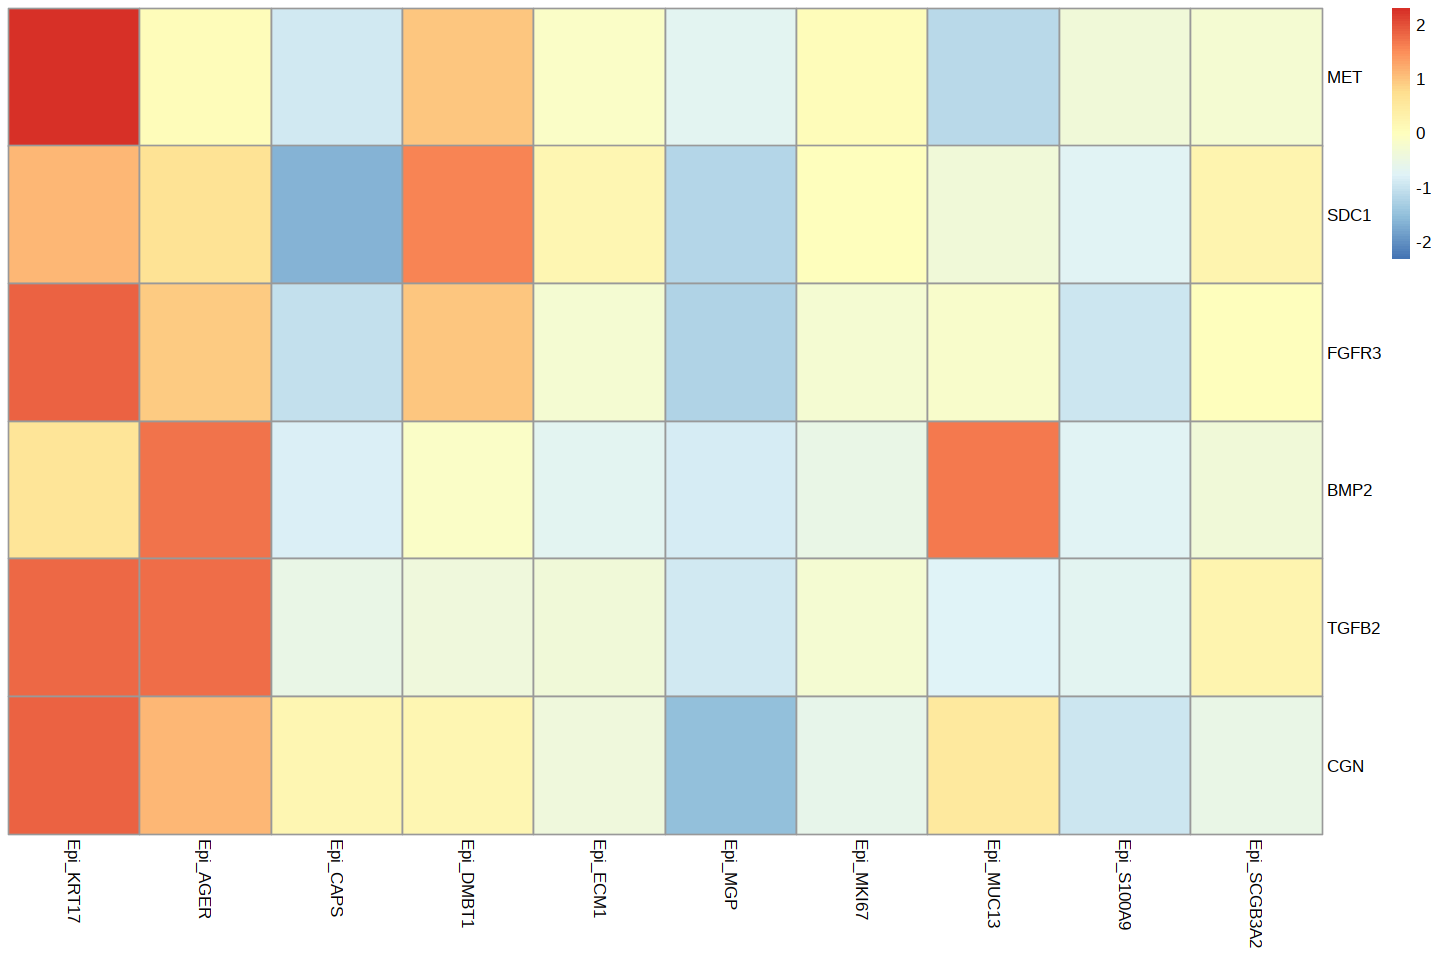

In [157]:
p = pheatmap::pheatmap(merged_epi[c('MET','SDC1','FGFR3','BMP2','TGFB2','CGN'),
                                  c('Epi_KRT17',sort(colnames(merged_epi))[5:8],sort(colnames(merged_epi))[10:14])],
                  scale ='row',
                  cluster_rows = F,
                   cluster_cols = F,
                   #show_colnames  = F
                  )
pdf('./results//figures/published/Figure3/heatmap_interaction_epis2.pdf',width = 10,height = 5)
print(p)
dev.off()

png 
  2

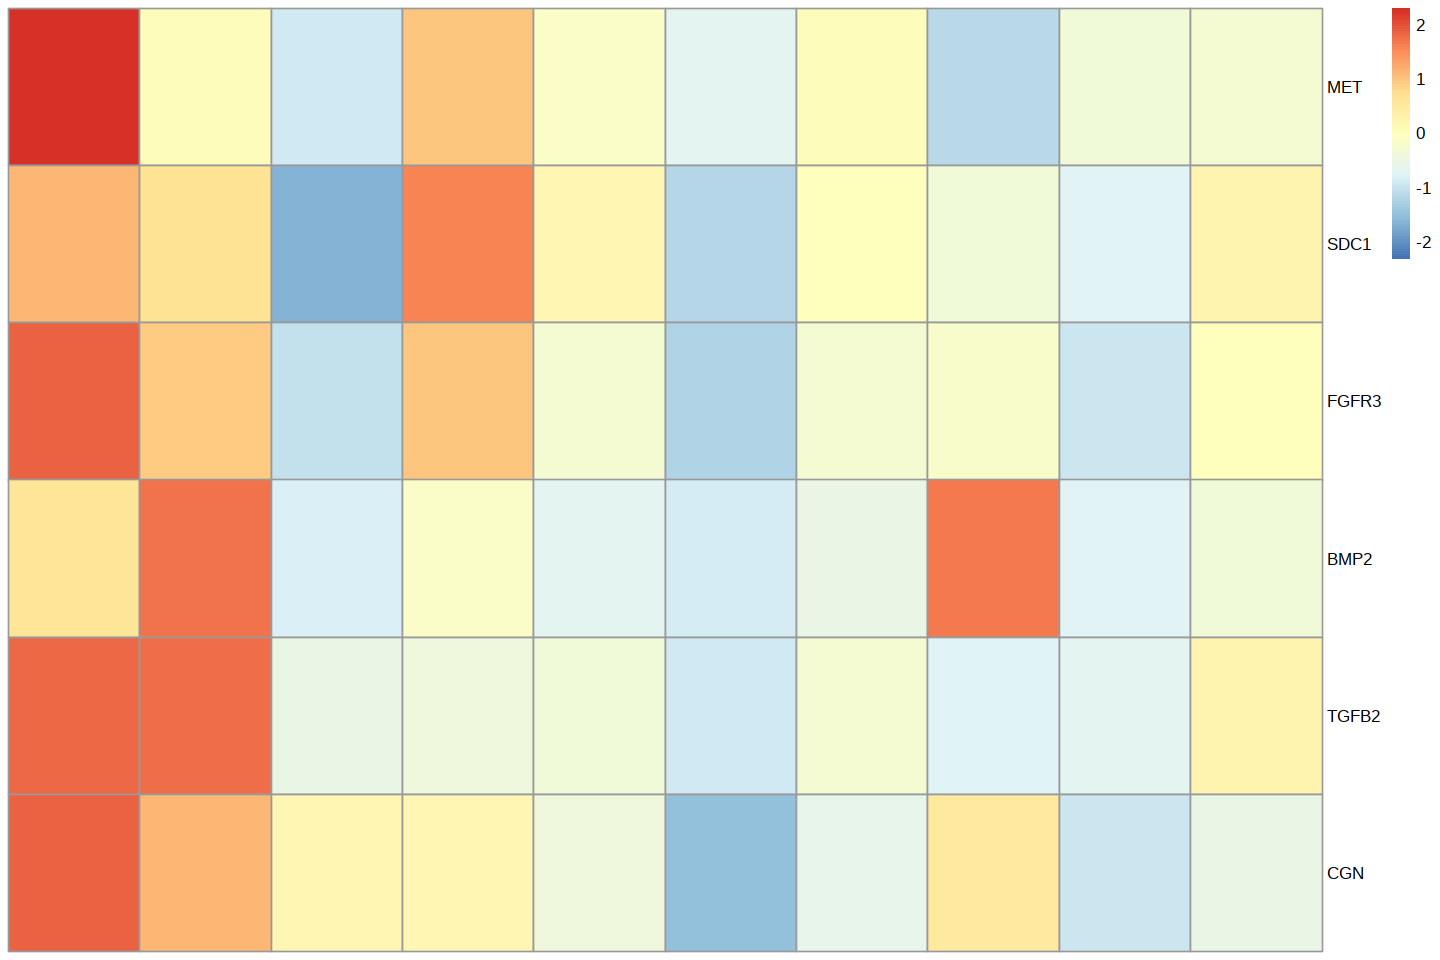

In [156]:
p = pheatmap::pheatmap(merged_epi[c('MET','SDC1','FGFR3','BMP2','TGFB2','CGN'),
                                  c('Epi_KRT17',sort(colnames(merged_epi))[5:8],sort(colnames(merged_epi))[10:14])],
                  scale ='row',
                  cluster_rows = F,
                   cluster_cols = F,
                   show_colnames  = F
                  )
pdf('./results//figures/published/Figure3/heatmap_interaction_epis.pdf',width = 10,height = 5)
print(p)
dev.off()

In [21]:
sort(unique(data$cellTypes_subsets))

[1] "Bfoc"                "Bmem"                "Bn"                 
 [4] "Bprf"                "CAF_ATCA2"           "CAF_FGF7"           
 [7] "CAF_FGF7_HGF"        "CD4_FOS"             "CD4_GZMB"           
[10] "CD4_Naive-like"      "CD4_Tfh"             "CD4_Treg"           
[13] "CD8_CD4_low"         "CD8_GZMK"            "CD8_LAG3"           
[16] "CD8_Naive-like"      "cDC1"                "cDC2"               
[19] "Epi_AGER"            "Epi_CAPS"            "Epi_DMBT1"          
[22] "Epi_ECM1"            "Epi_KRT17"           "Epi_MGP"            
[25] "Epi_MKI67"           "Epi_MUC13"           "Epi_S100A9"         
[28] "Epi_SCGB3A2"         "Fprf"                "LEC"                
[31] "Macrophage"          "Macrophage alveolar" "Mast cells"         
[34] "mDC"                 "Monocyte"            "Neutrophils"        
[37] "NK"                  "pB"                  "pDC"                
[40] "TEC"                 "Tprf"

In [20]:
DefaultAssay(data) = 'RNA'

## caf vs epi

In [22]:
liana_test = liana_wrap(data[,which(data$cellTypes_subsets %in% c('CAF_FGF7_HGF','Epi_KRT17'))], 
                        idents_col = 'cellTypes_subsets')
liana_test <- liana_test %>%
  liana_aggregate()
liana_test_plot = liana_test[order(liana_test$mean_rank,decreasing = F),]
liana_test_plot = liana_test_plot[which(liana_test_plot$cellphonedb.pvalue<0.05),]

Expression from the `RNA` assay will be used

Running LIANA with `cluster_name_1107` as labels!

`Idents` were converted to factor

Warning message in exec(output, ...):
“9 genes and/or 0 cells were removed as they had no counts!”
Warning message:
“`invoke()` is deprecated as of rlang 0.4.0.
Please use `exec()` or `inject()` instead.
This warning is displayed once every 8 hours.”
LIANA: LR summary stats calculated!

Now Running: Natmi

Now Running: Connectome

Now Running: Logfc

Now Running: Sca

Now Running: Cellphonedb

Warning message:
“`progress_estimated()` was deprecated in dplyr 1.0.0.
ℹ The deprecated feature was likely used in the liana package.
  Please report the issue at <https://github.com/saezlab/liana/issues>.”
Now aggregating natmi

Now aggregating connectome

Now aggregating logfc

Now aggregating sca

Now aggregating cellphonedb

Aggregating Ranks



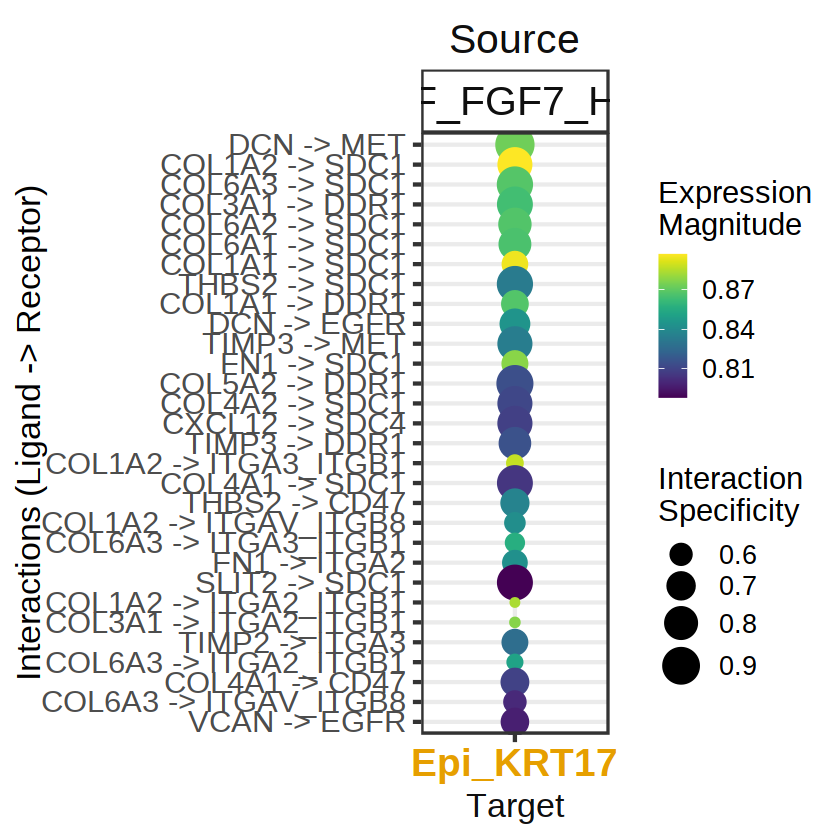

In [23]:
liana_test_plot %>%
  liana_dotplot(source_groups = c("CAF_FGF7_HGF"),
                target_groups = c('Epi_KRT17'),ntop=30)

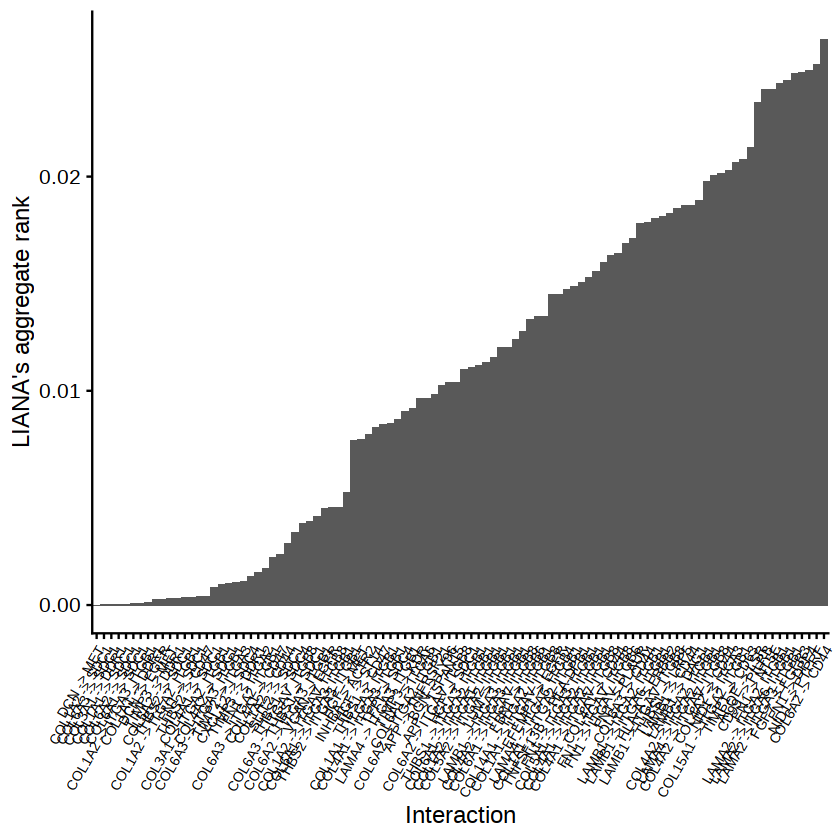

In [31]:
caf_tumor_results <- liana_test %>%
  subset(source == "CAF_FGF7_HGF" & target == "Epi_KRT17") %>%
  dplyr::rename(ligand=ligand.complex, receptor=receptor.complex)

# filter results to top N interactions
n <- 100
top_n_caf_tumor <- caf_tumor_results %>%
  arrange(aggregate_rank) %>%
  slice_head(n = n) %>%
  mutate(id = fct_inorder(paste0(ligand, " -> ", receptor)))

# visualize median rank
top_n_caf_tumor %>%
  ggplot(aes(y = aggregate_rank, x = id)) +
  geom_bar(stat = "identity") +
  xlab("Interaction") + ylab("LIANA's aggregate rank") +
  theme_cowplot() +
  theme(axis.text.x = element_text(size = 8, angle = 60, hjust = 1, vjust = 1))

In [32]:
#ligand_target_matrix <- readRDS("/share/pub/zhangyr/projects/cooperation/SJTU/ESCC/data/ligand_target/ligand_target_matrix.rds")
ligands <- unique(top_n_caf_tumor$ligand)
ligands <- ligands[ligands %in% colnames(ligand_target_matrix)]
ligands

[1] "COL1A1"   "THBS2"    "FN1"      "COL4A1"   "CXCL12"   "SLIT2"   
 [7] "THBS1"    "HGF"      "INHBA"    "TFPI"     "APP"      "LAMB1"   
[13] "FBN1"     "EFEMP1"   "TNFSF13B" "HLA-A"    "NID1"     "TIMP1"   
[19] "APOE"     "CD99"     "LAMA2"    "FGF7"

In [72]:
background_genes <- t(as.matrix(data@assays$RNA@data[,data$cellTypes_subsets == 'Epi_KRT17'])) %>%
  apply(2,function(x){10*(2**x - 1)}) %>%
  apply(2,function(x){log2(mean(x) + 1)}) %>%
  .[. >= 2] %>%
  names()

In [73]:
length(background_genes)

[1] 4405

In [81]:
epi_markers = read.csv('./results//Step2_subCluster//Epithelial cells/markers_20230119.csv',row.names=1)
head(epi_markers)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
CAPS,0,4.369737,0.949,0.136,0,Epi_CAPS,CAPS
C9orf24,0,4.066777,0.875,0.018,0,Epi_CAPS,C9orf24
TPPP3,0,3.966395,0.976,0.179,0,Epi_CAPS,TPPP3
C1orf194,0,3.823755,0.897,0.014,0,Epi_CAPS,C1orf194
TSPAN1,0,3.602729,0.938,0.354,0,Epi_CAPS,TSPAN1
FAM183A,0,3.592760,0.892,0.015,0,Epi_CAPS,FAM183A


In [82]:
epi_markers = epi_markers[which(epi_markers$p_val_adj<0.05),]
epi_markers = epi_markers[which(epi_markers$avg_log2FC>0.5),]

In [83]:
geneset_oi = epi_markers$gene[which(epi_markers$cluster == 'Epi_KRT17')]

In [84]:
length(geneset_oi)

[1] 541

In [85]:
nichenet_activities <- predict_ligand_activities(
  geneset = geneset_oi,
  background_expressed_genes = background_genes,
  ligand_target_matrix = ligand_target_matrix, potential_ligands = ligands
)

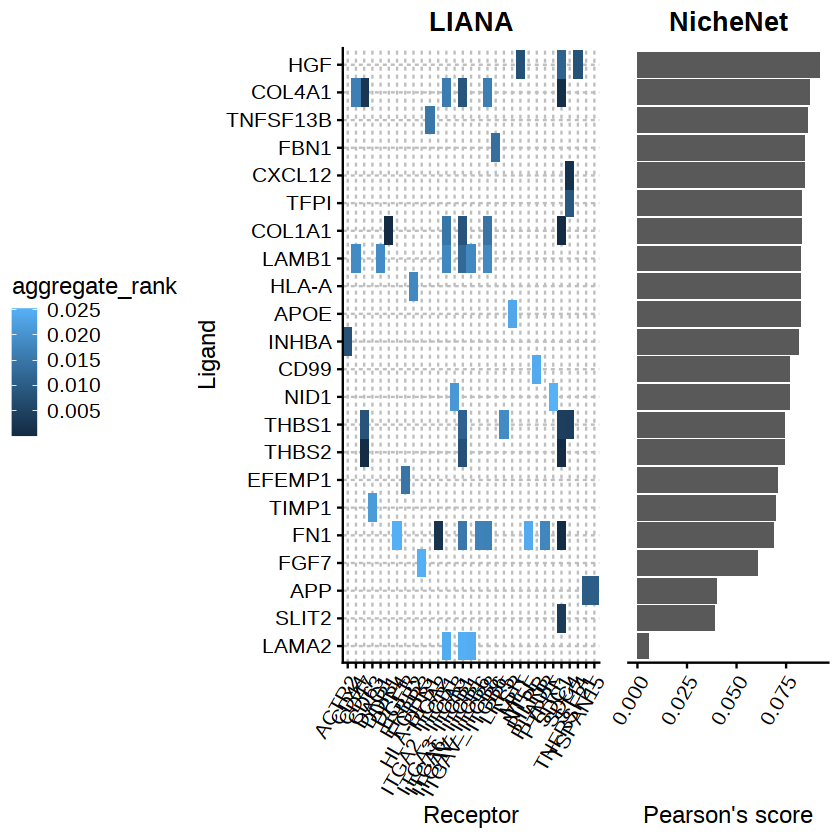

In [86]:
# prepare data for visualization
vis_liana_nichenet <- top_n_caf_tumor %>%
  inner_join(nichenet_activities, by = c("ligand" = "test_ligand")) %>%
  arrange(pearson) %>%
  mutate(ligand = fct_inorder(ligand))

# prepare NicheNet figure
nichenet_scores_plot <- vis_liana_nichenet %>%
  group_by(ligand) %>%
  summarize(pearson = mean(pearson)) %>%
  ggplot(aes(y = ligand, x = pearson)) +
  geom_bar(stat = "identity") +
  ggtitle("NicheNet") +
  xlab("Pearson's score") +
  theme_cowplot() +
  theme(axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.y = element_blank(),
        axis.line.y = element_line(color = "white"),
        plot.title = element_text(hjust = 0.5),
        axis.text.x = element_text(angle = 60, hjust = 1, vjust = 1))

# prepare LIANA figure
liana_receptor_heatmap <- vis_liana_nichenet %>%
  ggplot(aes(y = ligand, x = receptor, fill = aggregate_rank)) +
  geom_tile() +
  theme_cowplot() +
  ggtitle("LIANA") +
  ylab("Ligand") + xlab("Receptor") +
  theme(axis.text.x = element_text(angle = 60, hjust = 1, vjust = 1),
        plot.title = element_text(hjust = 0.5),
        panel.grid.major = element_line(colour = "gray", linetype = 2),
        legend.position = "left")

# combine plots
plot_grid(liana_receptor_heatmap, nichenet_scores_plot,
          align = "h", nrow = 1, rel_widths = c(0.8,0.3))

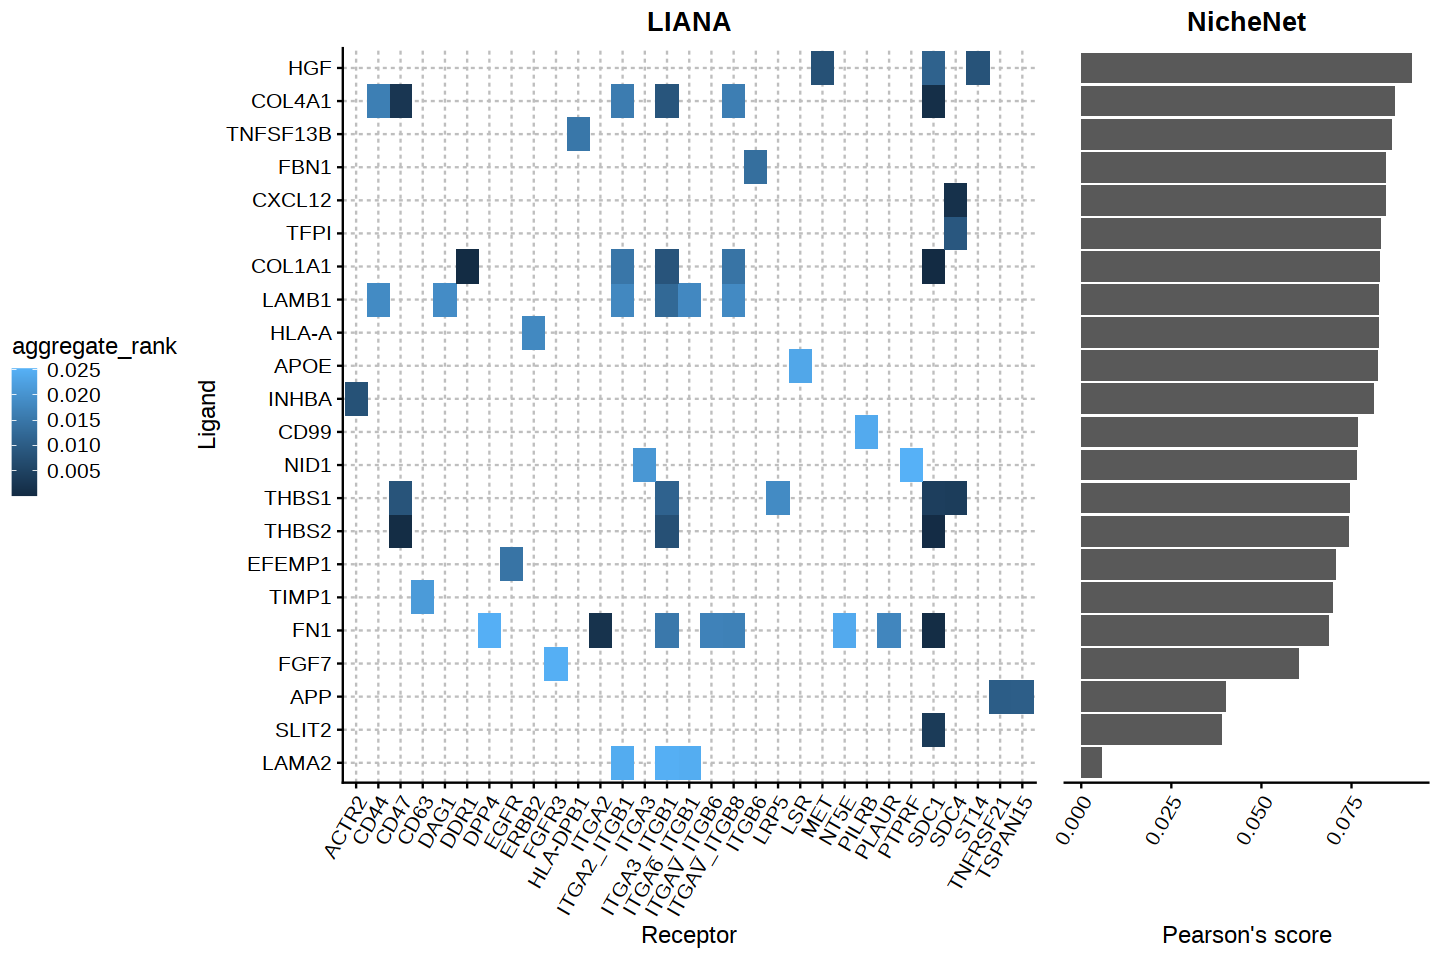

In [87]:
options(repr.plot.width=12, repr.plot.height=8)
plot_grid(liana_receptor_heatmap, nichenet_scores_plot,
          align = "h", nrow = 1, rel_widths = c(0.8,0.3))

In [37]:
liana_test = liana_wrap(data[,which(data$cellTypes_subsets %in% c('CAF_FGF7_HGF','CD8_GZMK','CAF_ATCA2'))], 
                        idents_col = 'cellTypes_subsets')

Expression from the `RNA` assay will be used

Running LIANA with `cluster_name_1107` as labels!

`Idents` were converted to factor

Warning message in exec(output, ...):
“35 genes and/or 0 cells were removed as they had no counts!”
LIANA: LR summary stats calculated!

Now Running: Natmi

Now Running: Connectome

Now Running: Logfc

Now Running: Sca

Now Running: Cellphonedb



In [38]:
liana_test <- liana_test %>%
  liana_aggregate()

Now aggregating natmi

Now aggregating connectome

Now aggregating logfc

Now aggregating sca

Now aggregating cellphonedb

Aggregating Ranks



In [ ]:
liana_test_plot = liana_test[order(liana_test$mean_rank,decreasing = F),]
liana_test_plot = liana_test_plot[which(liana_test_plot$cellphonedb.pvalue<0.05),]

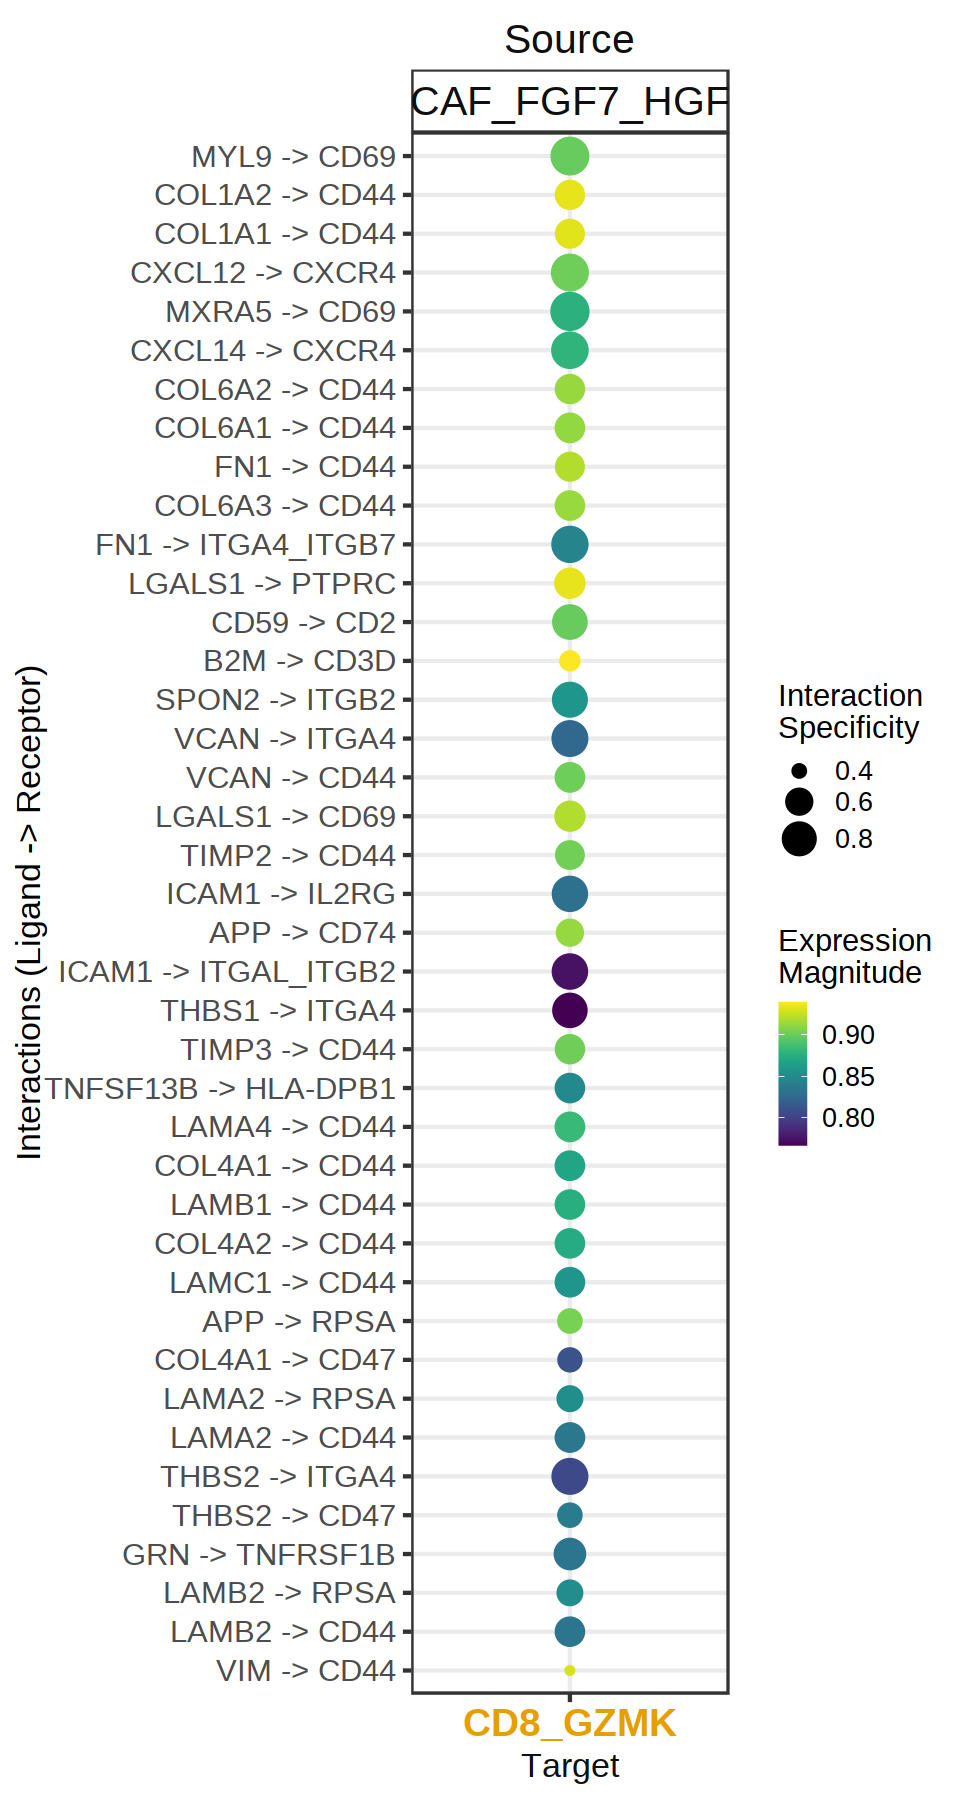

In [32]:
options(repr.plot.width=8, repr.plot.height=15)
liana_test %>%
  liana_dotplot(source_groups = c("CAF_FGF7_HGF"),
                target_groups = c("CD8_GZMK"),
                ntop = 40)

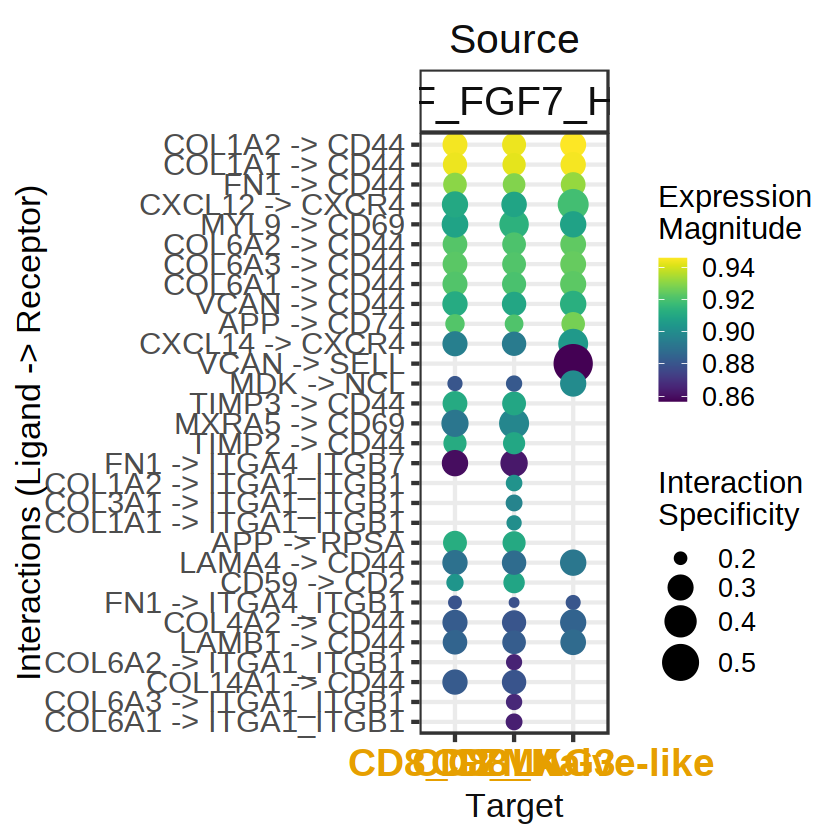

In [21]:
liana_test_plot = liana_test[order(liana_test$mean_rank,decreasing = F),]
liana_test_plot = liana_test_plot[liana_test_plot$aggregate_rank<0.01,]
liana_test_plot %>%
  liana_dotplot(source_groups = c("CAF_FGF7_HGF"),
                target_groups = c("CD8_GZMK",'CD8_LAG3','CD8_Naive-like'),ntop=30)

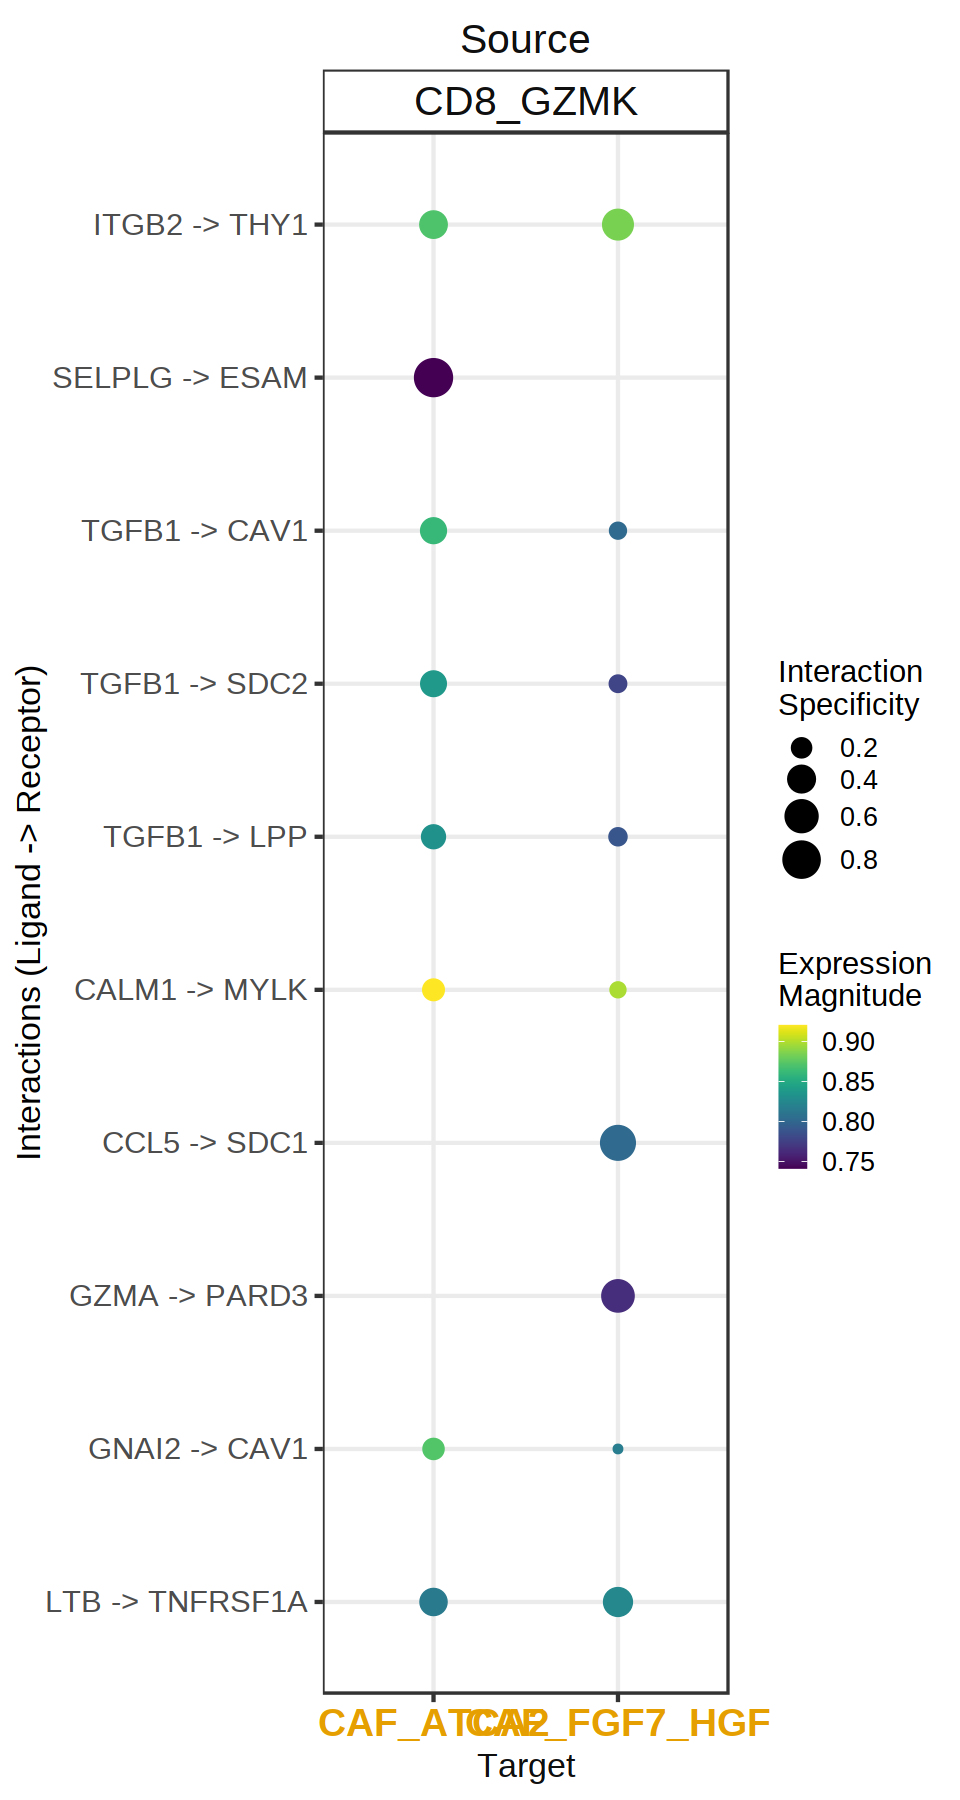

In [40]:
liana_test %>%
  liana_dotplot(source_groups = c("CD8_GZMK"),
                target_groups = c("CAF_FGF7_HGF",'CAF_ATCA2'),
                ntop = 10)

In [33]:
tcell = readRDS('./results//Step2_subCluster//T cells/res_20250515.rds')

In [4]:
icb = readRDS('./results//Step5_validation//ICB//2023_GM.rds')

In [5]:
group = rep('NMPR',ncol(icb))
group[which(icb$Sample_Id %in% c('BD_immune01','BD_immune05','BD_immune08'))] = 'TN'
group[which(icb$Sample_Id %in% c('BD_immune03','BD_immune06','BD_immune11','BD_immune14'))] = 'MPR'
icb$group = group

In [6]:
icb = FindNeighbors(icb)
icb = FindClusters(icb,resolution = 0.3)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 53646
Number of edges: 1623074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9541
Number of communities: 18
Elapsed time: 8 seconds


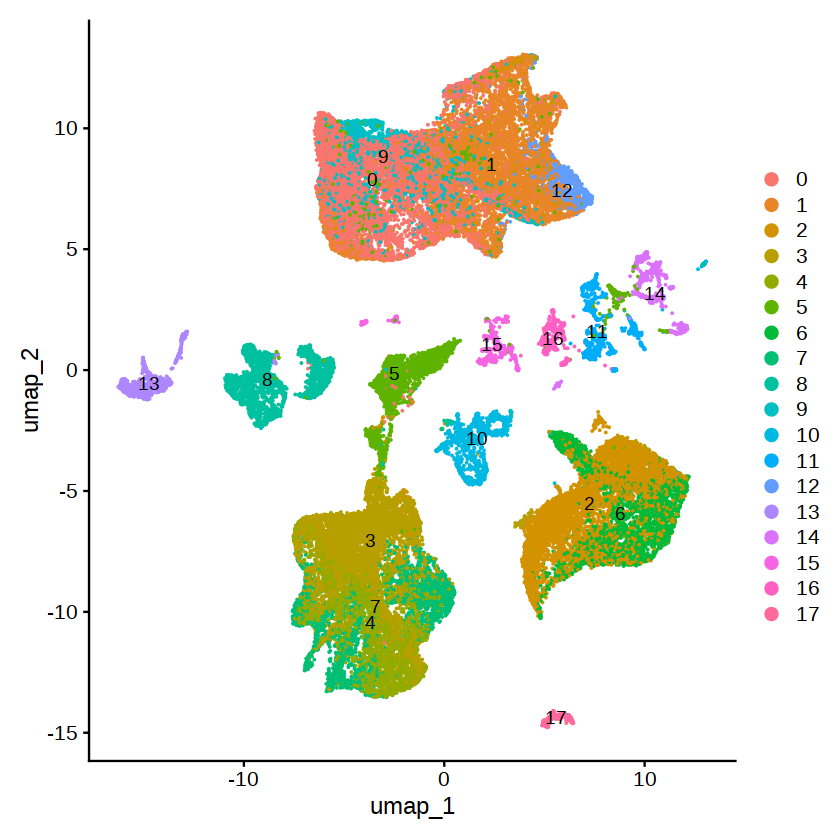

In [7]:
DimPlot(icb,label = T)

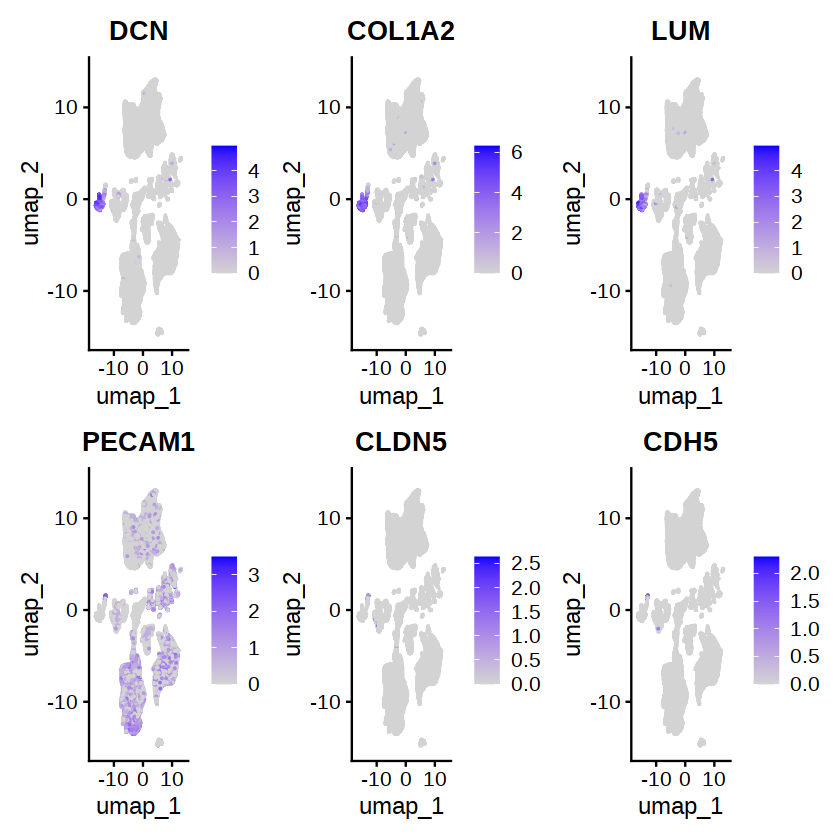

In [266]:
FeaturePlot(icb,c('DCN','COL1A2','LUM','PECAM1','CLDN5','CDH5'),ncol = 3)

In [270]:
pdf('./results//figures//published/Figure3/GSE207422_umap_stromal_markers.pdf',width = 12,height = 8)
FeaturePlot(icb,c('DCN','COL1A2','LUM','PECAM1','CLDN5','CDH5'),ncol = 3,raster=T)
dev.off()

png 
  2

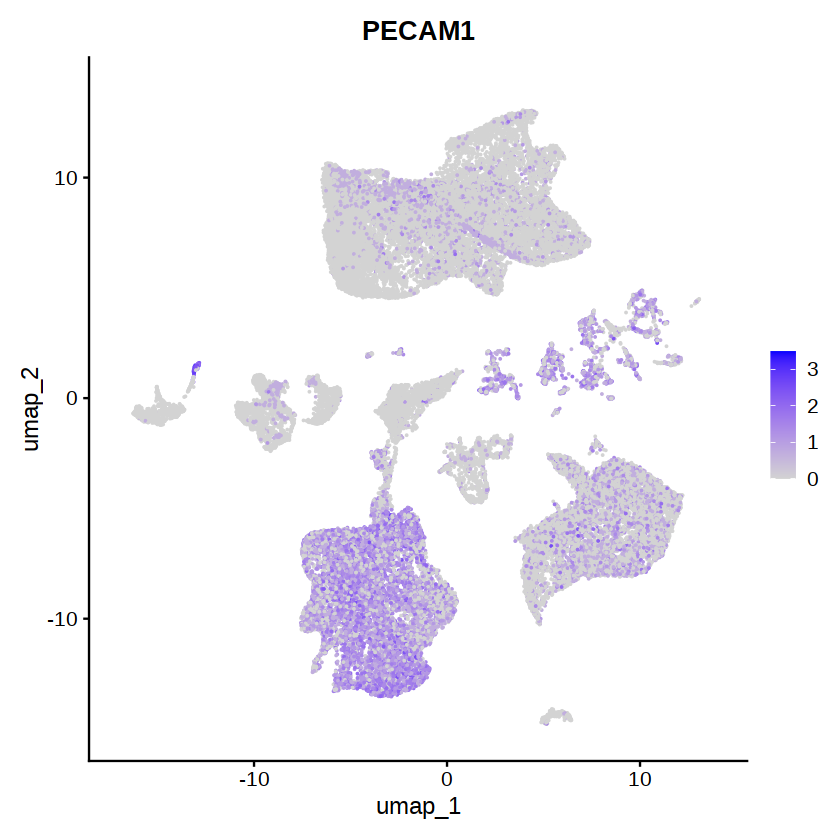

In [238]:
FeaturePlot(icb,'PECAM1')

In [8]:
fib = icb[,which(icb$seurat_clusters == 13)]
fib

An object of class Seurat 
48577 features across 786 samples within 2 assays 
Active assay: SCT (24285 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [9]:
fib$Sample_Id = as.character(fib$Sample_Id )

In [81]:
fib = FindVariableFeatures(fib,nfeatures = 2000)
fib = ScaleData(fib)
fib = RunPCA(fib)


Centering and scaling data matrix

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 72 features requested have zero variance (running reduction without them): IGLJ3, IGHV3-74, IGLJ2, IGLV3-21, IGLV3-19, IGKV3-11, IGHV4-34, IGHV2-5, IGHV1-18, ADCYAP1, IGKJ4, S100A12, PROK2, IGHJ3, IGHV3-33, CD1A, IGKV1D-8, AQP4, IL22RA2, PLA2G2D, IGKJ3, KRT4, P2RY13, AL034397.3, CYP4B1, IGKJ5, CYP2F1, MT1HL1, CAMP, HDC, XCL1, CLEC5A, AC009093.3, SERPIND1, CD1E, SIGLEC17P, IGLV5-52, ATP12A, PLD4, TRGC1, PGLYRP1, MMP8, C11orf88, IL13, APOC1P1, HS3ST2, LILRA4, CHST9, SPAG6, FCRLA, KLRC1, TCL1A, ERICH3, TRBV28, KLK12, OLFM4, MPEG1, AL357093.2, MGAM, GLT1D1, APOBR, CFAP126, TMEM190, CLEC4D, CD70, ZNF831, LINC02195, CAPN13, AC004687.1, LTA, SIGLEC8, MUCL3”
PC_ 1 
Positive:  RAMP2, CD93, CALCRL, PCDH17, AQP1, VWF, CD34, CLEC14A, FLT1, ESAM 
	   S1PR1, TM4SF1, PLVAP, SRGN, HLA-DRA, RNASE1, ADGRF5, CD74, HLA-E, HLA-DPA1 
	   DUSP6, SOX18, ITGA6, CRIP2, GIMAP7, ET

In [10]:
fib = SCTransform(fib)
fib = RunPCA(fib,assay.use = 'SCT')
fib = RunHarmony(fib, c('Sample_Id'),assay.use = 'SCT',project.dim = F,reduction = 'pca')
#fib = RunUMAP(fib, reduction='harmony', dims = 1:20)
#fib = FindNeighbors(fib,dims = 1:20,reduction = 'harmony')
#fib = FindClusters(fib,resolution = 0.2)
#DimPlot(fib,label = T)

Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

`vst.flavor` is set to 'v2' but could not find glmGamPoi installed.
Please install the glmGamPoi package for much faster estimation.
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('glmGamPoi')
--------------------------------------------
Falling back to native (slower) implementation.


Variance stabilizing transformation of count matrix of size 15268 by 786

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 786 cells

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in sqrt(1/i):
“Na

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, m

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Harmony converged after 10 iterations



Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 786
Number of edges: 23333

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9179
Number of communities: 6
Elapsed time: 0 seconds


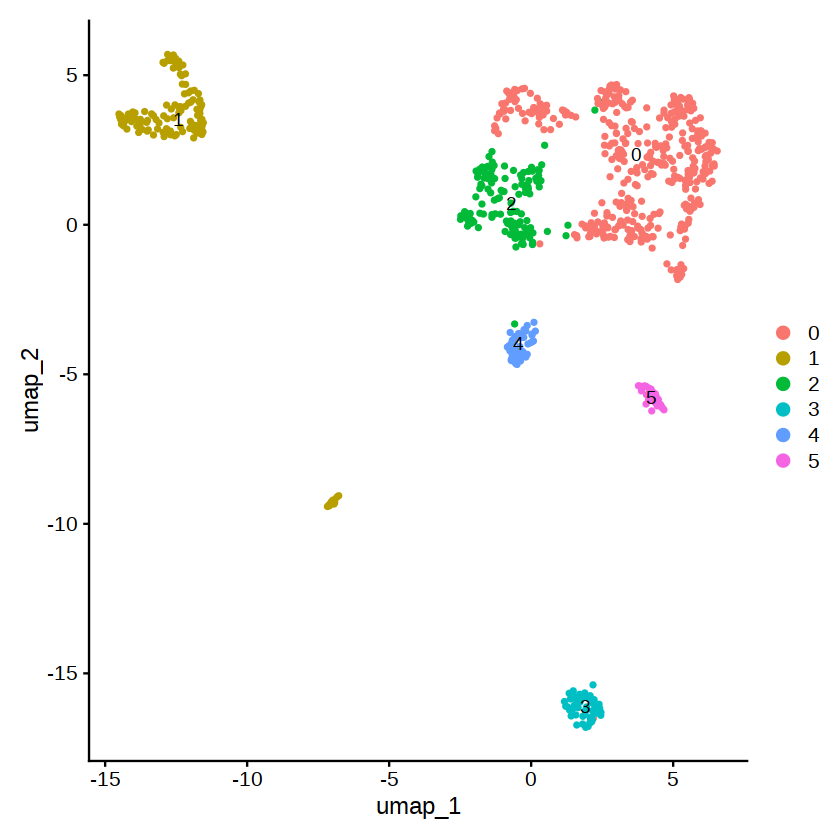

In [19]:
#fib = RunUMAP(fib, reduction='harmony', dims = 1:15)
fib = FindNeighbors(fib,dims = 1:15,reduction = 'harmony')
fib = FindClusters(fib,resolution = 0.2)
DimPlot(fib,label = T)

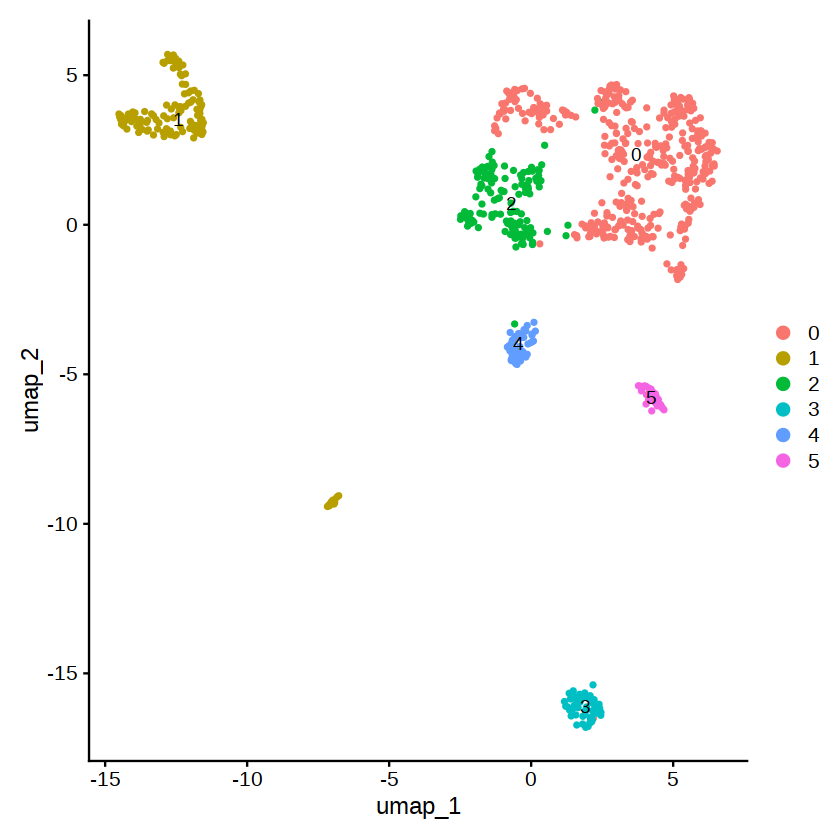

In [20]:
DimPlot(fib,label = T)

In [261]:
pdf('./results//figures//published/Figure3/GSE207422_umap_stromal.pdf',width = 4.6,height = 4)
DimPlot(fib,label = T)
dev.off()

png 
  2

In [15]:
unique(paste0('C_',fib$seurat_clusters))

[1] "C_5" "C_0" "C_1" "C_3" "C_4" "C_2"

In [23]:
cellType = paste0('C_',fib$seurat_clusters)
fib$cellType = factor(cellType,levels = paste0('C_',0:5))
Idents(fib) = factor(cellType,levels = paste0('C_',0:5))
treat = rep('Post-treatment',ncol(fib))
treat[which(fib$group == 'TN')] = 'Pre-treatment'
fib$treat = treat

In [ ]:
fib$

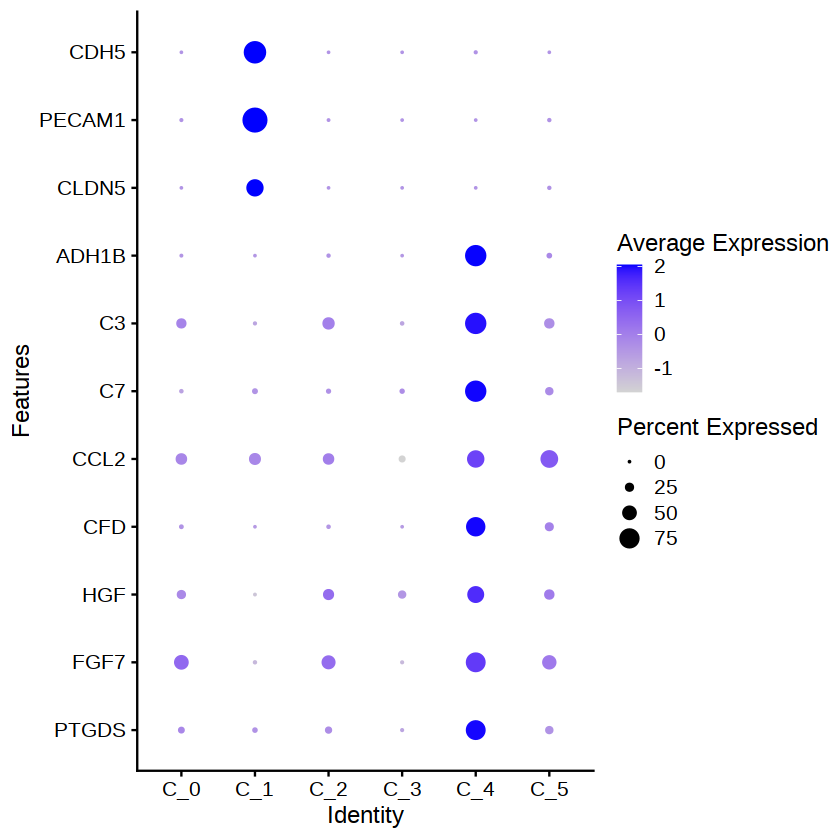

In [24]:
DotPlot(fib, c('PTGDS','FGF7','HGF','CFD','CCL2','C7','C3','ADH1B','CLDN5','PECAM1','CDH5'))+coord_flip()

In [27]:
saveRDS(fib,'./results//Step5_validation//ICB/2023_GM_sct_harmony_fib.rds')

In [247]:
bb = unique(fib@meta.data[,c('Sample_Id','treat')])
rownames(bb) = bb$Sample_Id


In [248]:
double = as.numeric(Idents(fib) %in% c('C_ 4'))
fib$double = double
aa = as.matrix(table(fib$Sample_Id,fib$double))
cc = as.numeric(aa[,2])/as.numeric(table(icb$Sample_Id)[rownames(aa)])
names(cc) = rownames(aa)

In [249]:
all_c = table(icb$Sample_Id)[rownames(aa)]
names(all_c) = rownames(all_c)
fib_c = table(fib$Sample_Id)[rownames(aa)]
names(fib_c) = rownames(fib_c)

In [250]:
bb$prop = aa[rownames(bb),2]/(aa[rownames(bb),1]+aa[rownames(bb),2])
bb$prop_all = cc[rownames(bb)]
bb$all_c = all_c[rownames(bb)]
bb$fib_c = fib_c[rownames(bb)]
bb$treat = factor(bb$treat, levels = c('Pre-treatment','Post-treatment'))

In [251]:
bb$treat = factor(bb$treat, levels = c('Pre-treatment','Post-treatment'))

In [252]:
bb$fib_prop = bb$fib_c/bb$all_c

In [254]:
compaired = list(c('Pre-treatment','Post-treatment'))

Warning message in geom_signif(mapping = aes(x = treat, y = prop), data = bb, inherit.aes = F, :
“You have set data and mapping, are you sure that manual = FALSE is correct?”


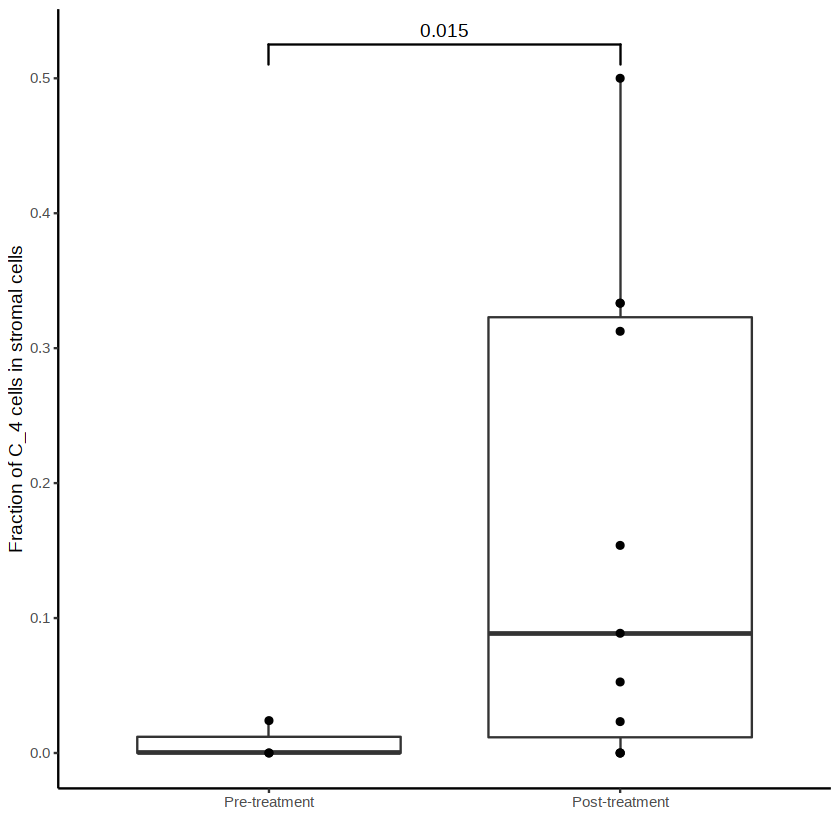

In [255]:
library(ggsignif)
ggplot(bb, aes(x=treat,y=prop))+geom_boxplot()+geom_point()+theme_bw()+
      geom_signif(mapping = aes(x=treat,y=prop), 
                  data = bb, inherit.aes=F,step_increase = 0.1,
                  comparisons = compaired,test ='t.test')+
      theme_bw()+theme(
        panel.border = element_blank(),
        panel.grid = element_blank(),
        axis.line.x.bottom = element_line(),
        axis.line.y.left = element_line(),
        #axis.ticks.x = element_blank(),
        #axis.text.x = element_blank(),
        legend.position = c(1.5,0.5))+ylab("Fraction of C_4 cells in stromal cells")+xlab("")
      

In [ ]:
fib2 = fib[,which(Idents(fib)!='C_ 1')]

In [257]:
bb = unique(fib2@meta.data[,c('Sample_Id','treat')])
rownames(bb) = bb$Sample_Id
double = as.numeric(Idents(fib2) %in% c('C_ 4'))
fib2$double = double
aa = as.matrix(table(fib2$Sample_Id,fib2$double))
cc = as.numeric(aa[,2])/as.numeric(table(icb$Sample_Id)[rownames(aa)])
names(cc) = rownames(aa)
bb$prop = aa[rownames(bb),2]/(aa[rownames(bb),1]+aa[rownames(bb),2])
bb$prop_all = cc[rownames(bb)]
bb$treat = factor(bb$treat, levels = c('Pre-treatment','Post-treatment'))

Warning message in geom_signif(mapping = aes(x = treat, y = prop), data = bb, inherit.aes = F, :
“You have set data and mapping, are you sure that manual = FALSE is correct?”


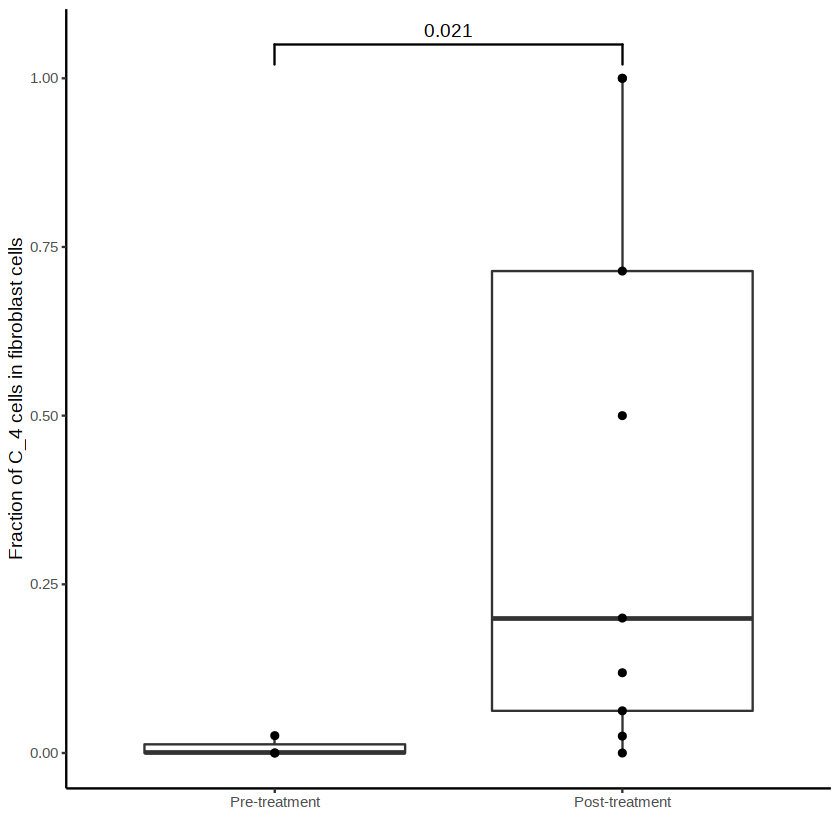

In [258]:
ggplot(bb, aes(x=treat,y=prop))+geom_boxplot()+geom_point()+theme_bw()+
      geom_signif(mapping = aes(x=treat,y=prop), 
                  data = bb, inherit.aes=F,step_increase = 0.1,
                  comparisons = compaired,test ='t.test')+
      theme_bw()+theme(
        panel.border = element_blank(),
        panel.grid = element_blank(),
        axis.line.x.bottom = element_line(),
        axis.line.y.left = element_line(),
        #axis.ticks.x = element_blank(),
        #axis.text.x = element_blank(),
        legend.position = c(1.5,0.5))+ylab("Fraction of C_4 cells in fibroblast cells")+xlab("")